# Randomization

In this notebook, we cover ideas from Section 3.2. We discuss how causal effects are determined in randomized experiments.

We consider the scenario where we want to analyze the effect of computer-issued versus robot-issued decision support on subject trust. In this scenario, we enroll $N=100$ subjects, who are randomly assigned to either the computer-issued or robot-issued decision support systems in a between subject study design.

We want to know if there is a causal relationship between the type of decision support and subject trust. To evaluate this, we can use standard statistical tools to compute the difference in means between the two experimental condition groups.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd

import statsmodels.api as sm
from scipy import stats
import causal_hri
from causal_hri.data import generate_robotic_assistance_dataset
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df1 = generate_robotic_assistance_dataset(N=1000, randomize=True)

generating data


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

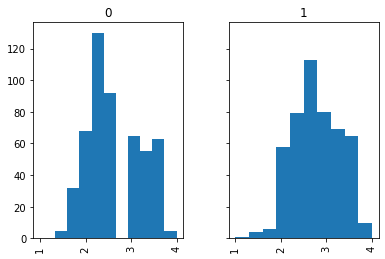

In [3]:
#df1.plot(x="decision_support", y="post_trust", kind="hist")
df1["post_trust"].hist(by=df1["decision_support"], sharey=True, sharex=True, bins=10)

We use $A$ to denote the type of decision support received in the study, where $A=0$ is computer-issued decision support and $A=1$ is robot-issued decision support. Given this data, we might consider the following null and alternative hypotheses:
\begin{align*}
H_0 &: E[Y | A=1] - E[Y | A=0] = 0\\
H_1 &: E[Y | A=1] - E[Y | A=0] > 0
\end{align*}

where the alternative is a one-sided test in the direction of robot-issued decision support being better.

The standard test for a causal effect in this scenario is the unpaired t-test assuming equal variances.

In [4]:
t_test_1 = stats.ttest_ind(a=df1.loc[df1["decision_support"]==0, "post_trust"],
                           b=df1.loc[df1["decision_support"]==1, "post_trust"],
                           equal_var=True,
                           alternative="less")

In [5]:
t_test_1

Ttest_indResult(statistic=-3.977202195082123, pvalue=3.738309035651559e-05)

As we can see, the p-value is less than our $\alpha=0.05$ statistical significance threshold, so we would reject the null hypothesis and conclude that robot-issued decision support was more effective at building trust than computer-issued decision support.